In this Notebook my main focus was on Exploratory Data Analysis(EDA) on a Hotel booking Data Set.
Analysed following information as below:
1)Hotel that was mostly preffered by customers
2)Number of confirmed and cancelled bookings
3)If there were Repeated Customers that visited hotel again
4)Types of Customers Visted 
5)Number of car parking spaces required by the customer
6)Type of meal that was mostly preffered by the customers
7)Country which have maximum customers
8)Year which gave highest bookings

In [58]:
#Import the required libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Import the data 

df=pd.read_csv("Hotel booking.csv")
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Cleaning

In [7]:
print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 119390 rows and 32 columns.


In [8]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [9]:
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,9/7/2017


In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
df1=df.copy()

# Checking Duplicates 

In [13]:
df1.duplicated().value_counts()

False    87396
True     31994
dtype: int64

We have 31994 duplicate values in data

So we are dropping the duplicate values

In [14]:
df1=df1.drop_duplicates()

In [16]:
df1.shape

(87396, 32)

In [18]:
df1.duplicated().value_counts()

False    87396
dtype: int64

# Checking Null Values

In [20]:
df1.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [21]:
df1.isna().sum().sort_values(ascending=False)


company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [22]:
# Replacing null values with 0.
null_columns=['agent','children','company']
for col in null_columns:
    df1[col].fillna(0,inplace=True)


# Replacing null values with 'Others'
df1['country'].fillna('Others',inplace=True)

In [23]:
df1.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})


,Columns,Null values
0,hotel,0
1,is_canceled,0
2,reservation_status,0
3,total_of_special_requests,0
4,required_car_parking_spaces,0
5,adr,0


In [28]:
df1.sort_values('adults',ascending=True).head(5)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
103264,City Hotel,0,0,2016,December,52,18,0,0,0,...,No Deposit,7.0,0.0,0,Transient,0.00,0,1,Check-Out,12/18/2016
71667,City Hotel,1,340,2017,July,28,9,2,2,0,...,No Deposit,9.0,0.0,0,Transient,90.05,0,2,Canceled,9/17/2016
47166,City Hotel,1,1,2016,February,7,11,0,3,0,...,No Deposit,9.0,0.0,0,Transient,0.00,0,1,No-Show,2/11/2016
52156,City Hotel,0,150,2016,May,23,31,0,3,0,...,No Deposit,9.0,0.0,0,Transient-Party,95.82,0,1,Check-Out,6/3/2016
65907,City Hotel,1,0,2017,April,15,10,0,0,0,...,No Deposit,0.0,279.0,0,Transient,0.00,0,0,Canceled,4/10/2017


In [29]:
len(df1[df1['adults']+df1['babies']+df1['children']==0])


166

In [30]:
df1.drop(df1[df1['adults']+df1['babies']+df1['children']==0].index,inplace=True)


In [31]:
df1['total_number_of_people'] = df1['adults'] + df1['babies'] + df1['children']   
df1['total_stays'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']  


In [32]:
df1.shape

(87230, 34)

In [33]:
df1.to_csv('Hotel_Bookings_Structured_Data.csv')


 # Exploratory Data Analysis(EDA)



1)Analysing which hotel was mostly prefered by customers?

<AxesSubplot:ylabel='hotel'>

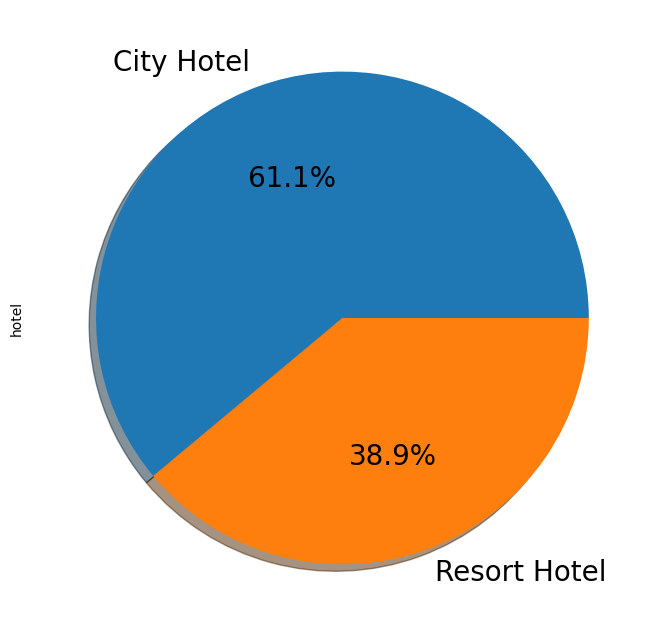

In [35]:
df1['hotel'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, figsize=(10,8),fontsize=20)


From the above analysis it is clear that city hotel was preffered by the customers

2)Analysing the percentage of booking cancelled

Text(0.5, 1.0, 'Cancellation(1) & Non_Cancellation(0) Of Bookings')

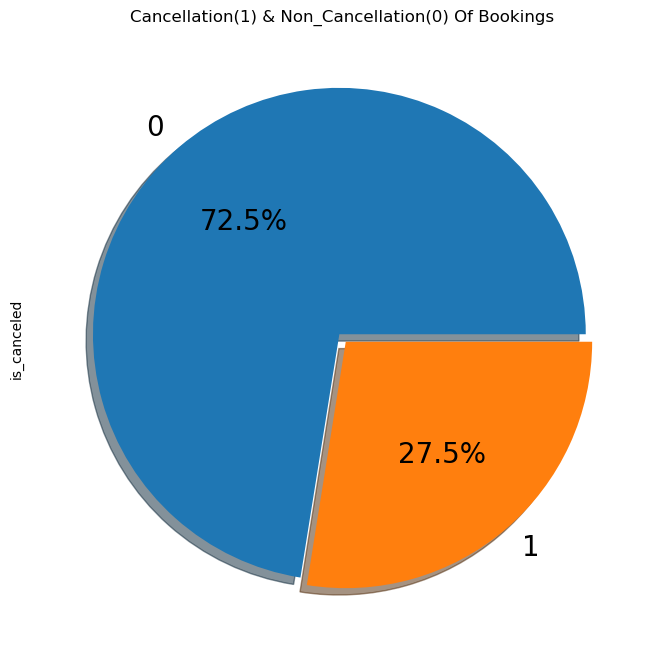

In [39]:
df1['is_canceled'].value_counts().plot.pie(explode=[0.02,0.02],autopct="%1.1f%%",shadow=True,figsize=(10,8),fontsize=20)
plt.title("Cancellation(1) & Non_Cancellation(0) Of Bookings")


For the above analysis we can see 72.5% booking were confirmed by customers

3)Analysing if customers have ever visited the hotels again

Text(0.5, 1.0, 'Percentage Of Repeated Guests(1) and Non Repeated Guests(0)')

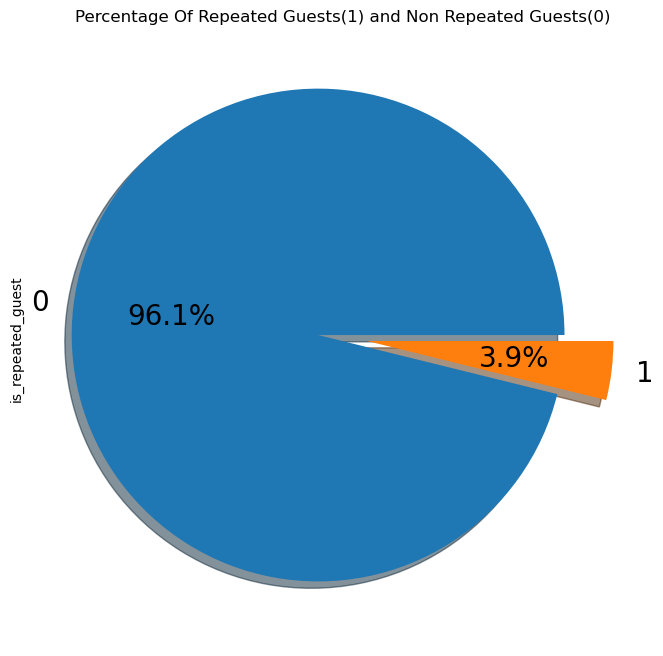

In [41]:
df1["is_repeated_guest"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)
plt.title("Percentage Of Repeated Guests(1) and Non Repeated Guests(0)")


Only 3.9% of the customers have visited the Hotels repeatedly.

4)Analysing Types of Customers visited hotels

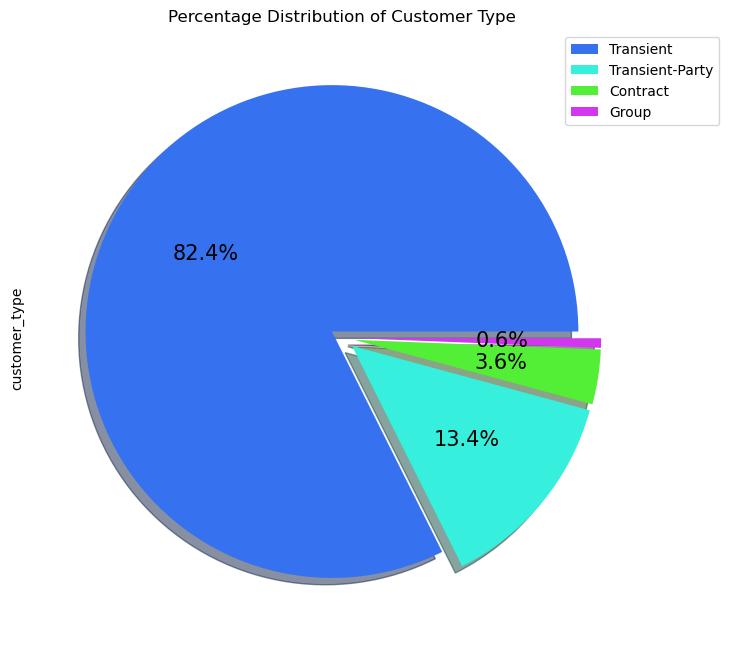

In [42]:
df1['customer_type'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05],colors=['#3671ef','#36efdc','#52ef36','#d336ef'],shadow=True,autopct='%1.1f%%',figsize=(12,8),fontsize=15,labels=None)


labels=df1['customer_type'].value_counts().index.tolist()
plt.title('Percentage Distribution of Customer Type')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

Around 82.4% i.e the maximum of bookings were made by Transit Customers so we can suggest the owners to provide some offers to the target audience

5)Analysing Car Parking Spaces

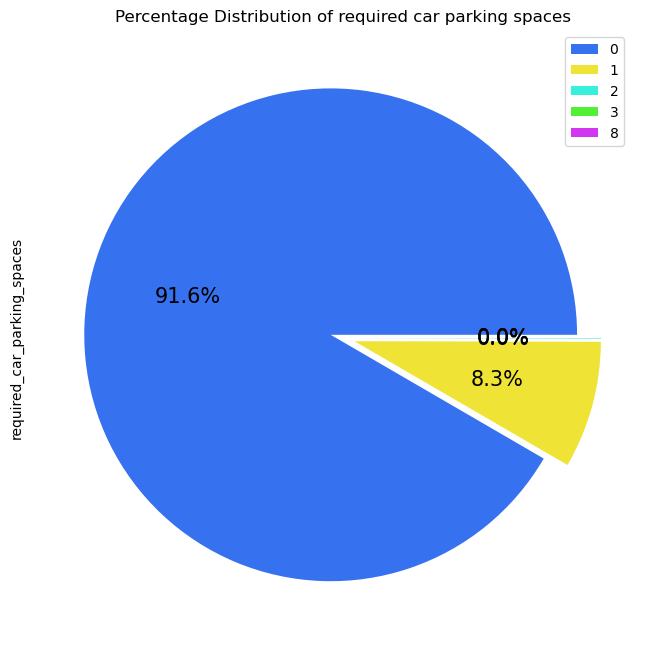

In [43]:
df1['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5,colors=['#3671ef','#efe336','#36efdc','#52ef36','#d336ef'], autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=None)

labels=df1['required_car_parking_spaces'].value_counts().index
plt.title('Percentage Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

6)Analysing Customers Preffered meal type

Text(0.5, 1.0, 'Preferred Meal Type')

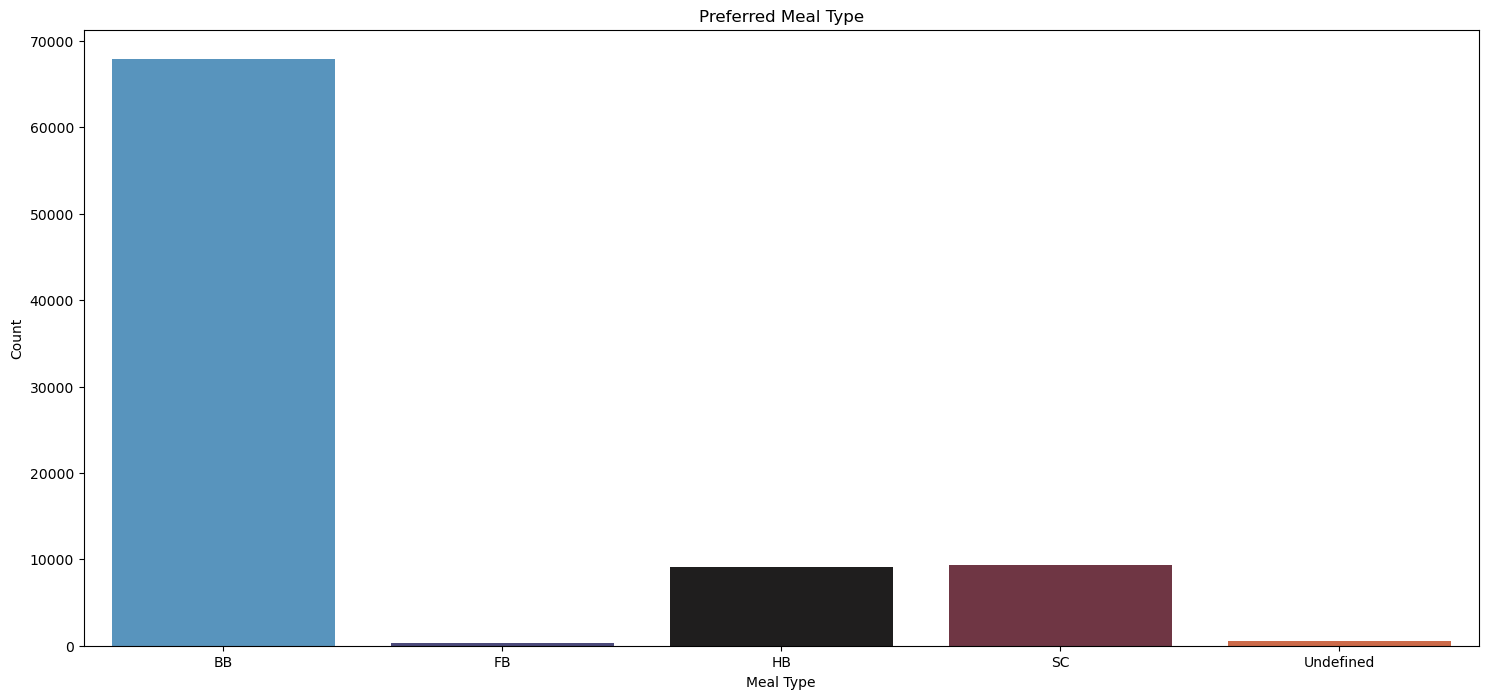

In [47]:
plt.figure(figsize=(18,8))
sns.countplot(x=df1["meal"],palette="icefire")
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")

From the above analysis it is clear that most of the customers preffered BB i.e Bed and Breakfast 

7)Analysing the Country that have maximum customers

In [50]:
country_df=df1['country'].value_counts().reset_index()
country_df

,index,country
0,PRT,27355
1,GBR,10424
2,FRA,8823
3,ESP,7244
4,DEU,5385
...,...,...
173,MMR,1
174,BFA,1
175,CYM,1
176,MLI,1


In [51]:
#Selecting top 5 countries 
country_df = country_df.rename(columns={'index': 'country','country': 'count of guests'})[:5]
country_df

,country,count of guests
0,PRT,27355
1,GBR,10424
2,FRA,8823
3,ESP,7244
4,DEU,5385


Text(0.5, 1.0, 'Number of guests from diffrent Countries')

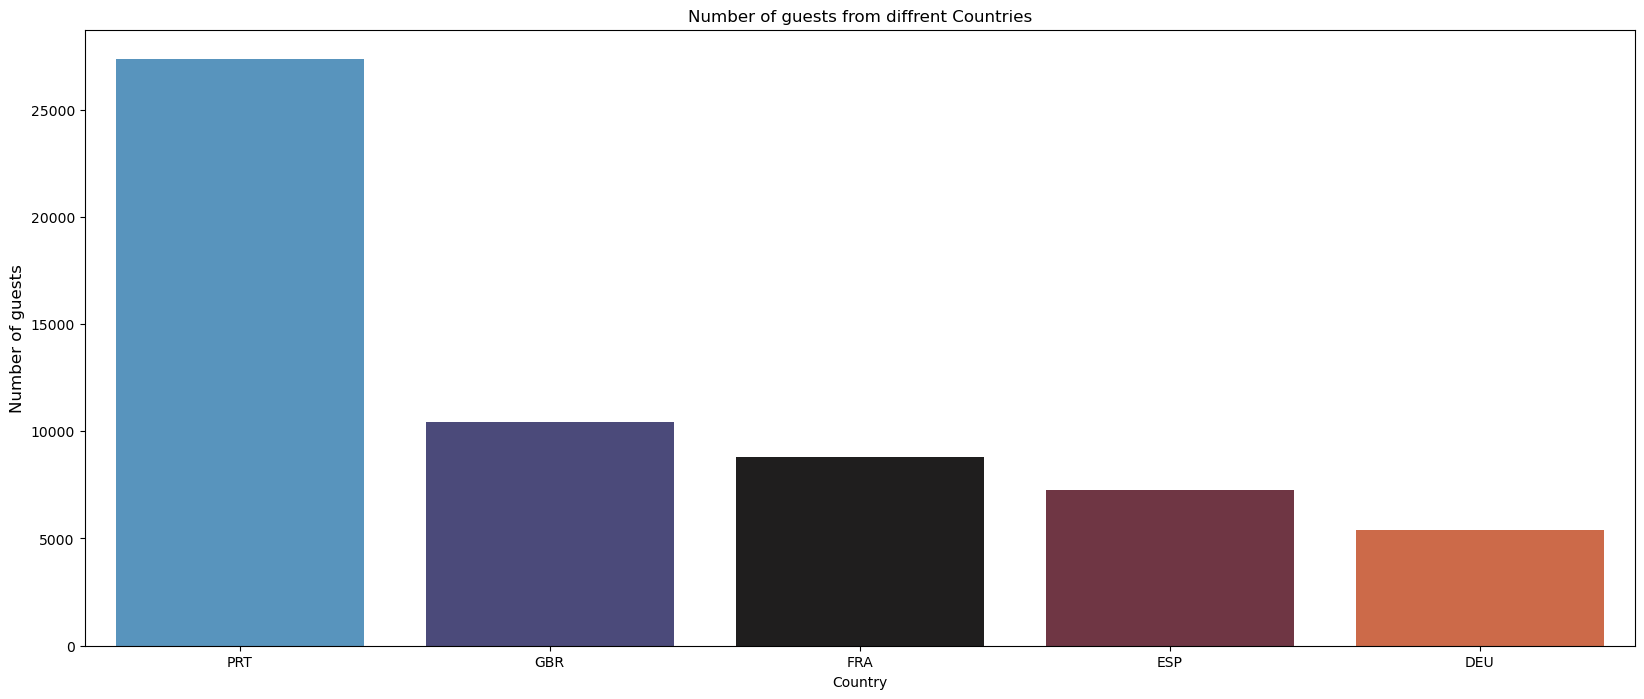

In [53]:
plt.figure(figsize=(20,8))
sns.barplot(x=country_df['country'],y=country_df['count of guests'],palette='icefire')
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Number of guests from diffrent Countries")

Maximum number of guests were from PRT followed by GBR,FRA,ESP,DEU

8)Analysing the year that has maximum number of bookings

Text(0.5, 1.0, 'Year Wise bookings')

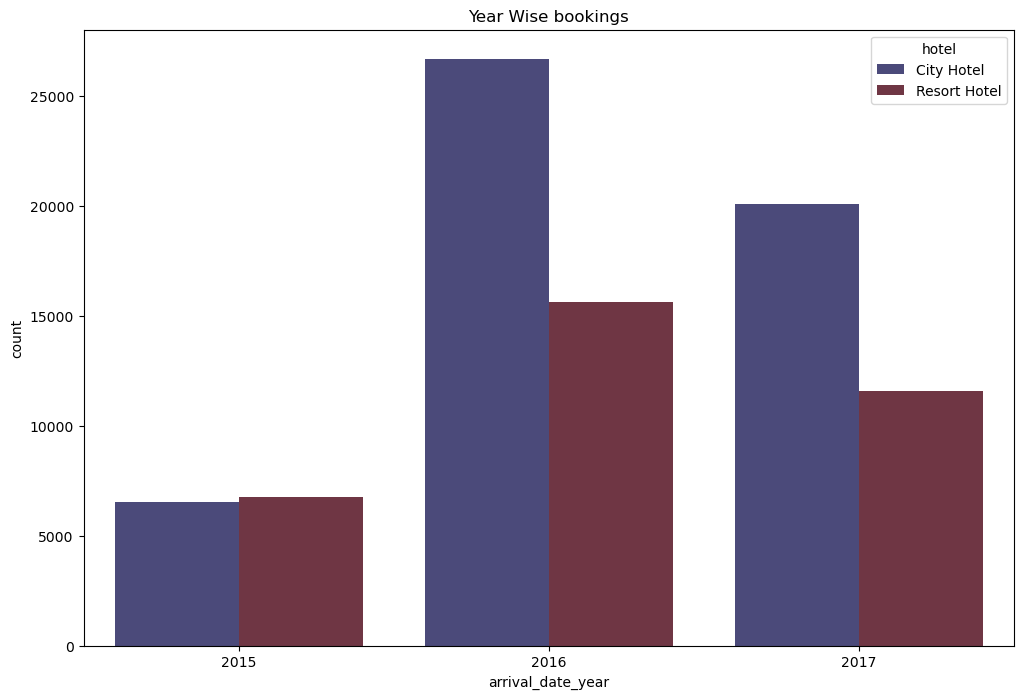

In [57]:
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=df1['arrival_date_year'],hue=df1['hotel'],palette='icefire')
plt.title("Year Wise bookings")

So it is clear that for both city and resort hotel 2016 and 2017 has the maximum number of booking